In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
purchase=pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Customer%20Purchase.csv")

In [4]:
purchase.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [5]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [6]:
purchase.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [7]:
purchase.columns

Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Purchased'], dtype='object')

In [8]:
X=purchase.drop(['Purchased','Customer ID'],axis=1)

In [9]:
y=purchase['Purchased']

In [11]:
X.replace({'Review':{'Poor':0,'Average':1,'Good':2}},inplace=True)
X.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
X.replace({'Education':{'School':0,'UG':1,'PG':2}},inplace=True)

In [12]:
X.head()

,Age,Gender,Education,Review
0,30,0,0,1
1,68,0,1,0
2,70,0,2,2
3,72,0,2,2
4,16,0,1,1


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=1)

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=500)


In [45]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [46]:
y_pred=model.predict(X_test)
y_pred

array(['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes'], dtype=object)

C:\Users\Aneesh\AppData\Local\Temp\ipykernel_11708\3771546572.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=purchase['Age'],bins=10)


<Axes: ylabel='Density'>

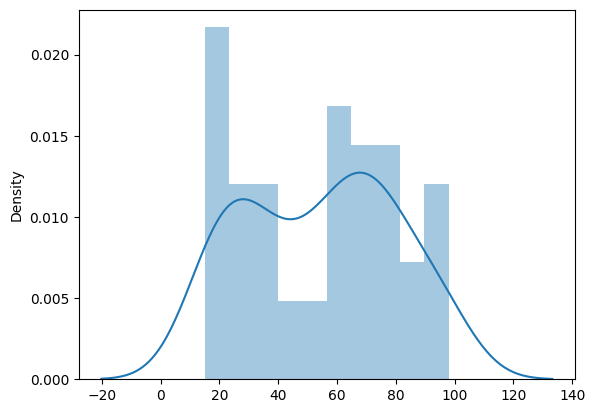

In [47]:
sns.distplot(x=purchase['Age'],bins=10)

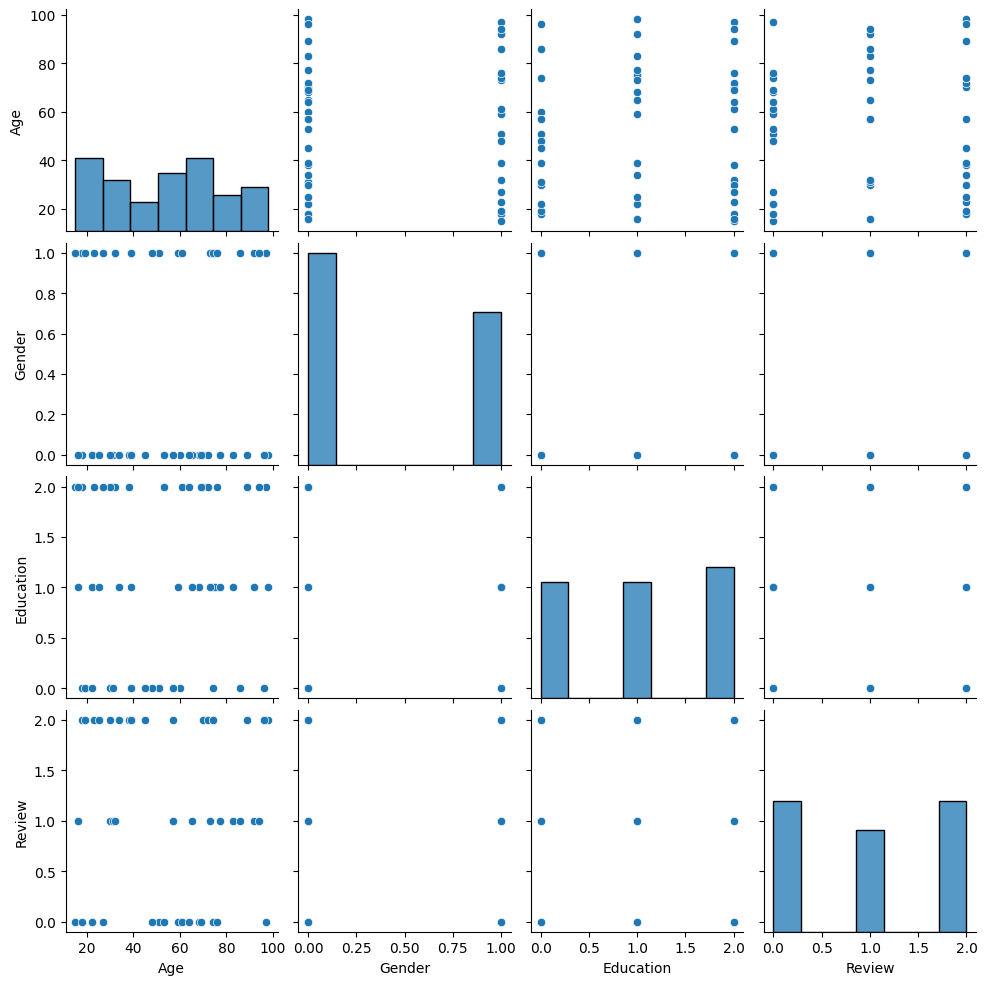

In [48]:
sns.pairplot(X)

<Axes: xlabel='Age'>

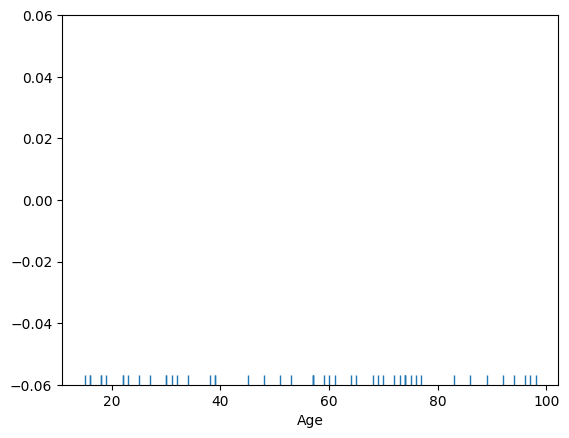

In [49]:
sns.rugplot(x=purchase['Age'])

<Axes: xlabel='Purchased', ylabel='Age'>

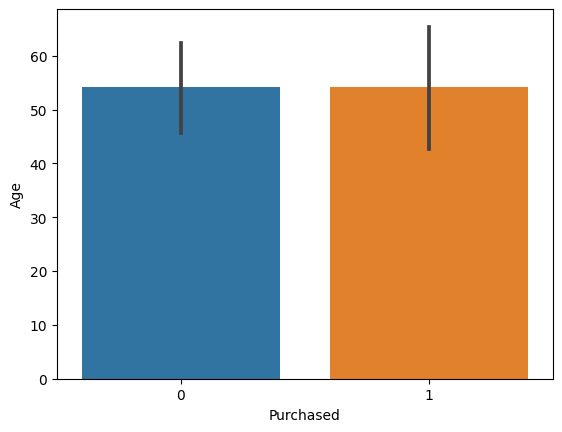

In [50]:
sns.barplot(x=purchase['Purchased'],y=purchase['Age'])

In [51]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
27,No,Yes
35,Yes,No
40,No,No
38,No,No
2,No,Yes
3,No,Yes
48,Yes,Yes
29,Yes,Yes
46,No,Yes
31,Yes,No


In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Training Score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Training Score: 0.6756756756756757
Testing Score: 0.38461538461538464
Accuracy Score: 0.38461538461538464


In [53]:
purchase['Purchased'].value_counts()

0    26
1    24
Name: Purchased, dtype: int64

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.50      0.25      0.33         8
         Yes       0.33      0.60      0.43         5

    accuracy                           0.38        13
   macro avg       0.42      0.42      0.38        13
weighted avg       0.44      0.38      0.37        13



In [59]:
confusion_matrix(y_test,y_pred)

array([[2, 6],
       [2, 3]], dtype=int64)